In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random
import seaborn as sns

from sklearn_rvm import EMRVR

TEXT_COLOR = 'black'
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['text.color'] = TEXT_COLOR
plt.rcParams['font.size'] = 14
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.labelcolor'] = TEXT_COLOR
plt.rcParams['xtick.color'] = TEXT_COLOR
plt.rcParams['ytick.color'] = TEXT_COLOR

In [2]:
#загрузка датасета
excel_data_df20 = pd.read_excel('electro_2020.xlsx', header=None)
excel_data_df21 = pd.read_excel('electro_2021.xlsx', header=None)

In [3]:
#загрузка класса для комбинации датасет по дате и времени.
from datetime import datetime

In [4]:
#транспонирование
excel_data_df20=excel_data_df20.T
excel_data_df21=excel_data_df21.T

In [5]:
#функция компoновки данных по дням недели 
def to_datetime(excel_data_df):
    excel_data_df[0] = pd.to_datetime(excel_data_df[0])
    excel_data_df['weekday'] = excel_data_df[0].dt.weekday
    excel_data_df['day_name'] = excel_data_df[0].dt.day_name()

    weekdays = excel_data_df[['weekday', 'day_name']].drop_duplicates().sort_values(by='weekday')\
    .set_index('weekday')['day_name'].to_dict()
    return excel_data_df

In [6]:
data_df20=to_datetime(excel_data_df20)
data_df21=to_datetime(excel_data_df21)

In [7]:
#функцияя группировки данных по дням недели и часу с усреднением 
def group(excel_data_df1):
    excel_data_df1.index=excel_data_df1['day_name']
    excel_data_df1=excel_data_df1.drop(['day_name','weekday',0], axis=1)
    excel_data_df1.columns.name='time'
    floats=np.float64(excel_data_df1)
    excel_data_df1=pd.DataFrame(floats, index=excel_data_df1.index, columns=excel_data_df1.columns)
    excel_data_df1=excel_data_df1.groupby(excel_data_df1.index).mean()
    return excel_data_df1

In [8]:
excel_data_df20=group(data_df20)
excel_data_df21=group(data_df21)

In [9]:
excel_data_df20

time,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,92.8825,91.105,90.3225,90.5075,91.9325,94.770,99.310,102.4975,106.0875,107.930,...,107.3725,107.7550,108.8775,108.880,107.8825,106.2725,104.1975,102.4375,98.9325,95.4000
Monday,91.7000,90.040,89.1825,89.5150,90.9800,93.975,98.655,102.2450,105.9775,108.055,...,107.4875,107.7275,108.6975,108.675,107.7925,106.2275,103.9250,102.1850,98.2075,94.4125
Thursday,92.3140,90.556,89.3200,89.4360,90.6480,93.242,97.354,100.3540,103.7540,105.782,...,105.4200,105.8380,107.1120,107.254,106.3280,104.7080,102.5580,100.8860,97.1980,93.8500
Tuesday,92.0220,90.020,89.2880,89.4600,90.7460,93.480,98.040,101.5880,105.1760,107.064,...,106.4940,106.9240,107.9420,108.042,107.1900,105.5640,103.3300,101.4420,97.6540,93.9660
Wednesday,92.3600,90.366,89.5780,89.7020,90.9360,93.748,98.100,101.4840,105.0060,106.928,...,106.1740,106.6060,107.7700,107.912,106.9580,105.4780,103.3020,101.5440,97.7200,94.1380


In [10]:
#сортировка датафрейма в правильном недельном порядке 
def sort_week_days(data: pd.DataFrame)->pd.DataFrame:
    ''' Принимает пивот таблицу data и  index,
    на выходе имеет отсортированные данные sorted_data и
    список упорядоченных дней недели sorted_wk_days '''

    wk_days_mask=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    wk_days=list(data.index)
    sorted_wk_days=sorted(wk_days, key=wk_days_mask.index)
    sorted_data=data.reindex(sorted_wk_days)

    return sorted_data, sorted_wk_days

excel_data_df20, day_name=sort_week_days(excel_data_df20)
excel_data_df21, day_name=sort_week_days(excel_data_df21)

In [11]:
excel_data_df21

time,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,92.9625,91.2275,90.5150,90.675,91.6125,93.9550,97.6225,100.2025,103.8175,106.1850,...,106.350,106.7350,107.8775,108.5500,107.9850,106.6175,104.5550,102.9675,99.3950,96.0150
Tuesday,93.7200,92.0375,91.5775,91.620,92.6750,94.9350,98.4625,100.9725,104.3825,106.5425,...,106.260,106.5775,107.7575,108.4325,107.8850,106.5475,104.5525,102.9875,99.4325,96.0600
Wednesday,94.1350,92.4200,91.8425,91.910,92.7875,95.0125,98.7150,101.1125,104.5575,106.8075,...,106.850,107.1150,108.1775,108.9600,108.3575,106.9925,104.9675,103.3625,99.7650,96.3375
Thursday,94.3775,92.4975,91.7900,91.970,92.8775,95.2100,98.8725,101.1900,104.6100,106.7750,...,106.880,107.1850,108.1075,108.8475,108.3350,106.9875,104.9675,103.1975,99.6400,96.2750
Friday,93.5740,91.8280,91.1360,90.910,91.5640,93.2720,96.4040,98.5460,101.2660,103.1280,...,103.886,104.2840,105.5240,106.4620,106.0060,104.7700,103.0120,101.2860,98.0540,94.9160


In [12]:
def plot(excel_data_df20):
    excel_data_df20.T.plot()
    plt.title('Электропотребление', color=TEXT_COLOR)
    plt.xlabel('t, час')
    plt.ylabel('Р, МВт*10^3')
    plt.legend()
    plt.grid(True)
    plt.show()

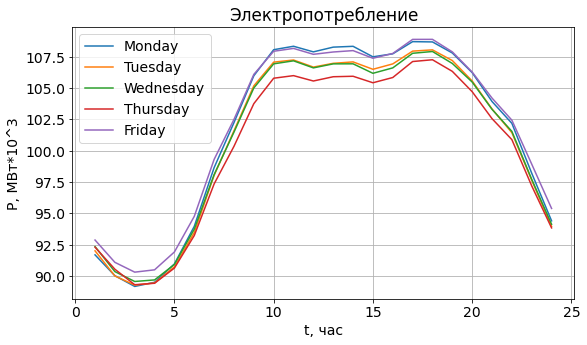

In [13]:
plot(excel_data_df20)

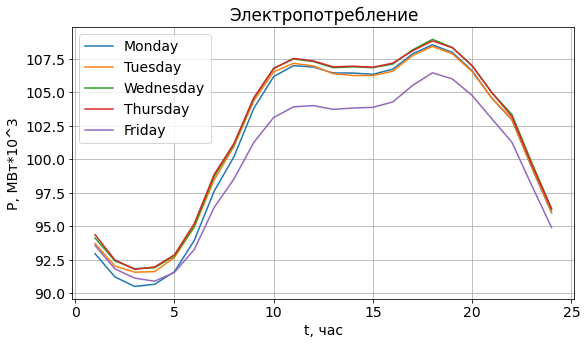

In [14]:
plot(excel_data_df21)

In [15]:
#функция построения гистограмм
def plot_hists_and_adf(data: pd.DataFrame, title: str, x_label: str)->dict:
    fig, axes = plt.subplots(5)
    fig.set_size_inches(5, 15)
    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    
    for num, day in enumerate(data.index):
        sns.histplot(data.T[day], ax=axes[num], element="step", kde=True, alpha=0.01)
        axes[num].set_xlabel(x_label)
        axes[num].set_ylabel('Counts')
        axes[num].set_title(day)


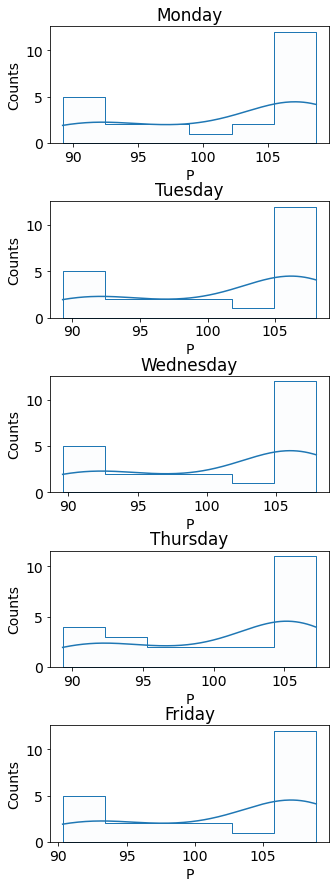

In [16]:
plot_hists_and_adf(excel_data_df20, 'places', 'P')

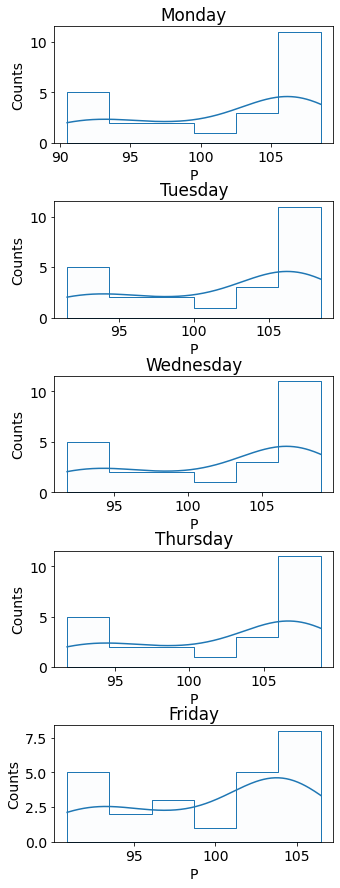

In [17]:
plot_hists_and_adf(excel_data_df21, 'places', 'P')

In [18]:
#функция нормализации данных 
from sklearn.preprocessing import MinMaxScaler
def MinMax(excel_data_df20: pd.DataFrame):
    scaler_20=MinMaxScaler()
    scaler_20=scaler_20.fit(excel_data_df20.T)
    scaled_data_20 =scaler_20.transform(excel_data_df20.T)
    scaled_data_20 =pd.DataFrame(scaled_data_20.T)
    scaled_data_20.index=excel_data_df20.index
    return scaled_data_20, scaler_20

In [19]:
scaled_data_20, _=MinMax(excel_data_df20)

In [20]:
scaled_data_21, _=MinMax(excel_data_df21)

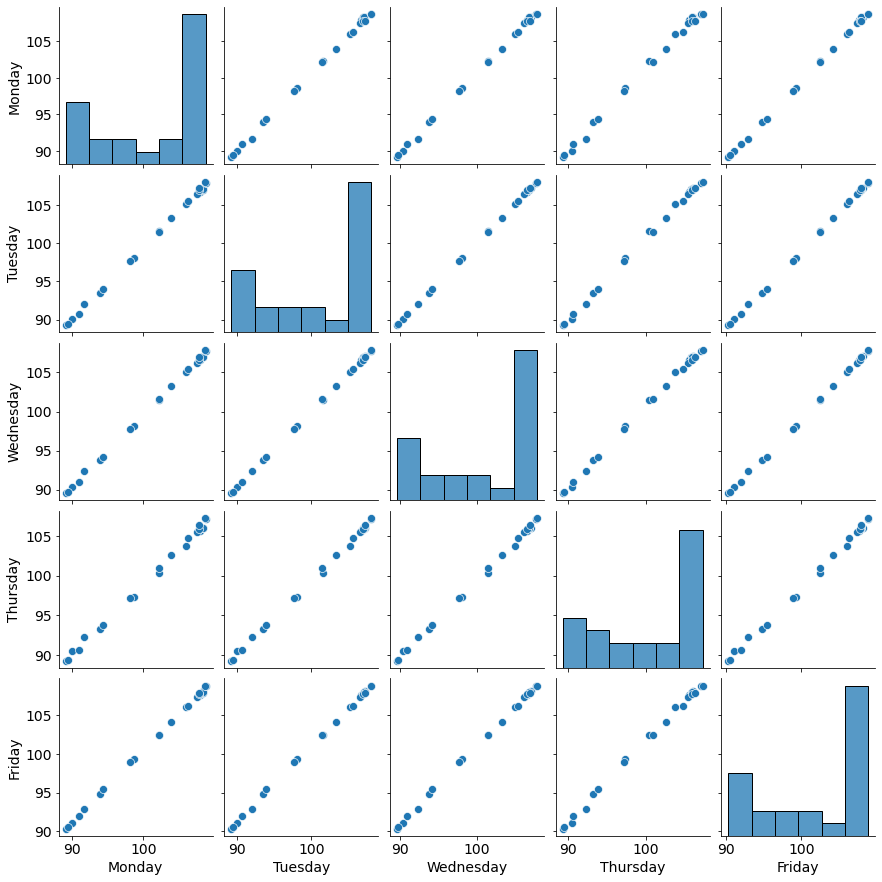

In [21]:
sns.pairplot(excel_data_df20.T)

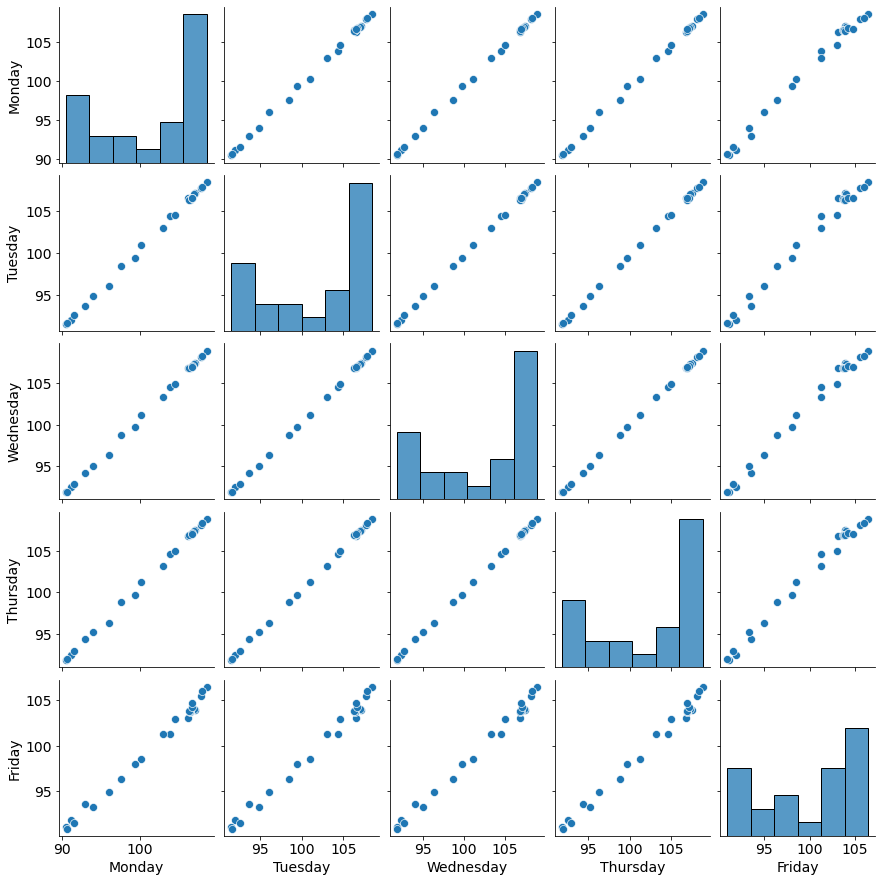

In [22]:
sns.pairplot(excel_data_df21.T)

In [23]:
#получение значений p-value и 
from scipy import stats
day_corr, day_p=dict(), dict()
def corr(data):
    for day in data.index:
        dict_corr, dict_p=dict(), dict()
        for sec_day in excel_data_df21.index:
            dict_corr[sec_day], dict_p[sec_day]=stats.pearsonr(data.loc[day], data.loc[sec_day])
        day_corr[day], day_p[day]=dict_corr, dict_p

        corr_df, p_df=pd.DataFrame(day_corr), pd.DataFrame(day_p)
    return corr_df, p_df

In [24]:
corr(excel_data_df21)

(             Monday   Tuesday  Wednesday  Thursday    Friday
 Monday     1.000000  0.999249   0.999550  0.999201  0.996623
 Tuesday    0.999249  1.000000   0.999803  0.999713  0.994867
 Wednesday  0.999550  0.999803   1.000000  0.999892  0.996122
 Thursday   0.999201  0.999713   0.999892  1.000000  0.995578
 Friday     0.996623  0.994867   0.996122  0.995578  1.000000,
                  Monday       Tuesday     Wednesday      Thursday  \
 Monday     0.000000e+00  1.464804e-32  5.214688e-35  2.907647e-32   
 Tuesday    1.464804e-32  0.000000e+00  6.089456e-39  3.802747e-37   
 Wednesday  5.214688e-35  6.089456e-39  0.000000e+00  8.398013e-42   
 Thursday   2.907647e-32  3.802747e-37  8.398013e-42  0.000000e+00   
 Friday     2.208554e-25  2.191573e-23  1.009094e-24  4.271364e-24   
 
                   Friday  
 Monday      2.208554e-25  
 Tuesday     2.191573e-23  
 Wednesday   1.009094e-24  
 Thursday    4.271364e-24  
 Friday     2.228269e-170  )

In [25]:
corr(excel_data_df20)

(             Monday   Tuesday  Wednesday  Thursday    Friday
 Monday     1.000000  0.999550   0.999515  0.998349  0.999748
 Tuesday    0.999550  1.000000   0.999929  0.999326  0.999776
 Wednesday  0.999515  0.999929   1.000000  0.999419  0.999717
 Thursday   0.998349  0.999326   0.999419  1.000000  0.998924
 Friday     0.999748  0.999776   0.999717  0.998924  1.000000,
                  Monday       Tuesday     Wednesday      Thursday  \
 Monday     0.000000e+00  5.311465e-35  1.213331e-34  8.480050e-29   
 Tuesday    5.311465e-35  0.000000e+00  7.918699e-44  4.485893e-33   
 Wednesday  1.213331e-34  7.918699e-44  0.000000e+00  8.759038e-34   
 Thursday   8.480050e-29  4.485893e-33  8.759038e-34  0.000000e+00   
 Friday     8.969717e-38  2.494621e-38  3.205976e-37  7.707363e-31   
 
                  Friday  
 Monday     8.969717e-38  
 Tuesday    2.494621e-38  
 Wednesday  3.205976e-37  
 Thursday   7.707363e-31  
 Friday     0.000000e+00  )

In [27]:
#предсказание на тренировочном наборе   
model = EMRVR(kernel="linear", gamma="scale")
train_data=scaled_data_20.iloc[0,:]
train_labels=scaled_data_20.iloc[1,:]
model.fit(train_data.values.reshape(-1, 1), train_labels)
y_pred_train = model.predict(train_data.values.reshape(-1, 1))

C:\Users\darya\anaconda3\lib\site-packages\sklearn_rvm\em_rvm.py:357: RuntimeWarning: divide by zero encountered in true_divide
  self.alpha_ = np.maximum(self.gamma_, self.epsilon) / (


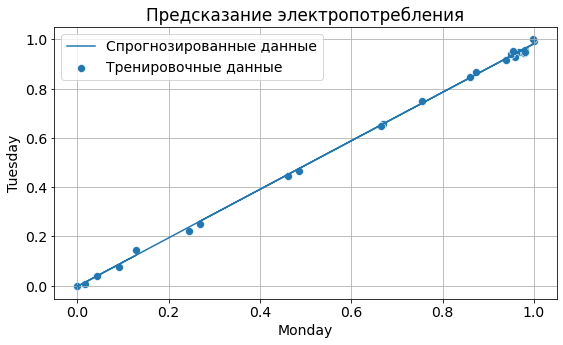

In [28]:
sns.scatterplot(x=train_data, y=train_labels, label='Тренировочные данные')
plt.plot(train_data, y_pred_train, label='Спрогнозированные данные')
#plt.plot(train_data, y_pred_Tues, label='pred data')
plt.title('Предсказание электропотребления', color=TEXT_COLOR)
plt.legend()
plt.grid(True)
plt.savefig('pred_train.png')
plt.show()

In [29]:
#функция получения метрик MAE, MSE, R2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def metrics(test_df,y_test, y_pred,model):
    r2 = r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    var_dict = {
        'mae_score' : mae,
        'r2_score' : r2,
        'mse_score' : mse
            }
    return var_dict

In [30]:
#предсказание на тестовом наборе 
def validate_model(train_data: pd.DataFrame, train_labels: pd.Series, test_data: pd.DataFrame, test_label: pd.Series):
    model=EMRVR(kernel="linear", gamma="scale")
    model.fit(train_data.values.reshape(-1, 1), train_labels.values)
    
    y_pred=model.predict(test_data.values.reshape(-1, 1))
    
    metr=metrics(test_data.values.reshape(-1, 1), test_label, y_pred, model)
    return model, y_pred, metr

In [31]:
#построение моделей прогноза для каждого дня
np.seterr(divide='ignore', invalid='ignore')

def validete_all_model(train_data: pd.DataFrame, test_data: pd.DataFrame)->dict:

    model_dict, y_pred_dict, metr_dict=dict(),dict(),dict()
    for i, day in enumerate(scaled_data_20.index):
        if day=='Friday':
            model_dict[day], y_pred_dict[day], metr_dict[day] =validate_model(train_data.loc[day], train_data.loc['Monday'], 
                                                                              test_data.loc[day], test_data.loc['Monday'])
            break
        else:
            model_dict[day], y_pred_dict[day], metr_dict[day]=validate_model(train_data.loc[day], train_data.iloc[i+1], 
                                                                             test_data.loc[day], test_data.iloc[i+1])
    return model_dict, y_pred_dict, metr_dict

model_dict, y_pred_dict, metr_dict=validete_all_model(scaled_data_20, scaled_data_21)

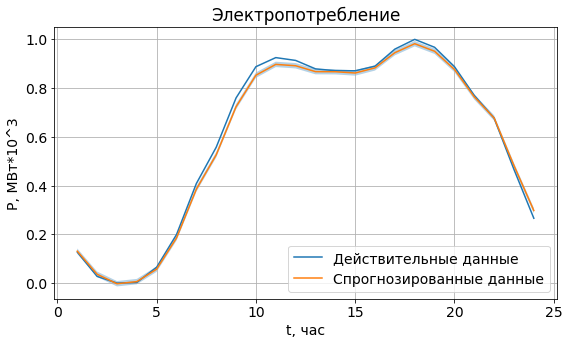

In [32]:
#Построение графика предсказания электропотребления для вторника
chas=np.arange(1,25,1)
plt.plot(chas, scaled_data_21.iloc[1], label='Действительные данные')
plt.plot(chas, y_pred_dict['Monday'], label='Спрогнозированные данные')
plt.fill_between(chas,y_pred_dict['Monday']-0.0111,y_pred_dict['Monday']+0.0111,alpha=.33)

plt.title('Электропотребление', color=TEXT_COLOR)
plt.xlabel('t, час')
plt.ylabel('Р, МВт*10^3')
plt.legend()
plt.grid(True)
plt.show()
